In [1]:
!pip install mysql-connector-python pandas


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.0/16.1 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.1/16.1 MB 327.7 kB/s eta 0:00:49
   ---------------------------------------- 0.1/16.1 MB 435.7 kB/s eta 0:00:37
   ---------------------------------------- 0.1/16.1 MB 420.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/16.1 MB 423.5 kB/s eta 0:00:38
   ---------------------------------------- 0.1/16.1 MB 392.6 kB/s eta 0:00:41
   ---------------------------------------- 0.2/16.1 MB 455.1 kB/s eta 0:00:35
   ---------------------------------------- 0.2/16.1 MB 454.0 kB/s eta 0:00:36
    --------------------------------------- 0.2/16.1 MB 452.1 kB/s eta 0:00:36
    --------------------------------------- 0.3/16.1 MB 506.7 kB/s

In [6]:
import mysql.connector


try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="12345",  
        database="downtime_db"  
    )
    print("✅ MySQL Connection Successful!")
    conn.close()  
except Exception as e:
    print("❌ Connection Failed:", e)


✅ MySQL Connection Successful!


In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mishr\Desktop\mini internship\data_set_mi\Machine Downtime_v2.csv")

print(df.head())  


         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(

In [11]:
import mysql.connector
import pandas as pd
from datetime import datetime  # ✅ Date conversion import

# Step 1: MySQL connect 
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="12345",  # MySQL password 
        database="downtime_db"
    )
    cursor = conn.cursor()
    print("✅ MySQL Connection Successful!")
except Exception as e:
    print("❌ Connection Failed:", e)

#  Step 2: CSV file load 
df = pd.read_csv(r"C:\Users\mishr\Desktop\mini internship\data_set_mi\Machine Downtime_v2.csv")

#  Step 3: Data insert but correct Date format 
for index, row in df.iterrows():
    try:
        # ✅ Date Format Convert (DD-MM-YYYY → YYYY-MM-DD)
        correct_date = datetime.strptime(row["Date"], "%d-%m-%Y").strftime("%Y-%m-%d")

        sql = """INSERT INTO machine_downtime 
        (date, machine_id, assembly_line_no, hydraulic_pressure, coolant_pressure, air_system_pressure, 
         coolant_temperature, hydraulic_oil_temp, spindle_bearing_temp, tool_vibration, spindle_speed, 
         voltage, torque, cutting_kn, downtime_reason) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

        values = (
            correct_date, row["Machine_ID"], row["Assembly_Line_No"], row["Hydraulic_Pressure(bar)"],
            row["Coolant_Pressure(bar)"], row["Air_System_Pressure(bar)"], row["Coolant_Temperature"],
            row["Hydraulic_Oil_Temperature(°C)"], row["Spindle_Bearing_Temperature(°C)"], row["Tool_Vibration(µm)"],
            row["Spindle_Speed(RPM)"], row["Voltage(volts)"], row["Torque(Nm)"], row["Cutting(kN)"], row["Downtime"]
        )

        cursor.execute(sql, values)

    except Exception as e:
        print(f"❌ Error inserting row {index}: {e}")

# ✅ Step 4: Changes save and connection close 
conn.commit()
cursor.close()
conn.close()
print("🚀 Data Successfully Inserted into MySQL!")


✅ MySQL Connection Successful!
🚀 Data Successfully Inserted into MySQL!


In [5]:
print(df.info())  # Columns type and missing values 
print(df.describe())  # Numerical columns summary statistics
print(df.isnull().sum())  # Missing values count 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [6]:
print(df.columns)


Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')


In [7]:
print(df.duplicated().sum())  # duplicate rows count


0


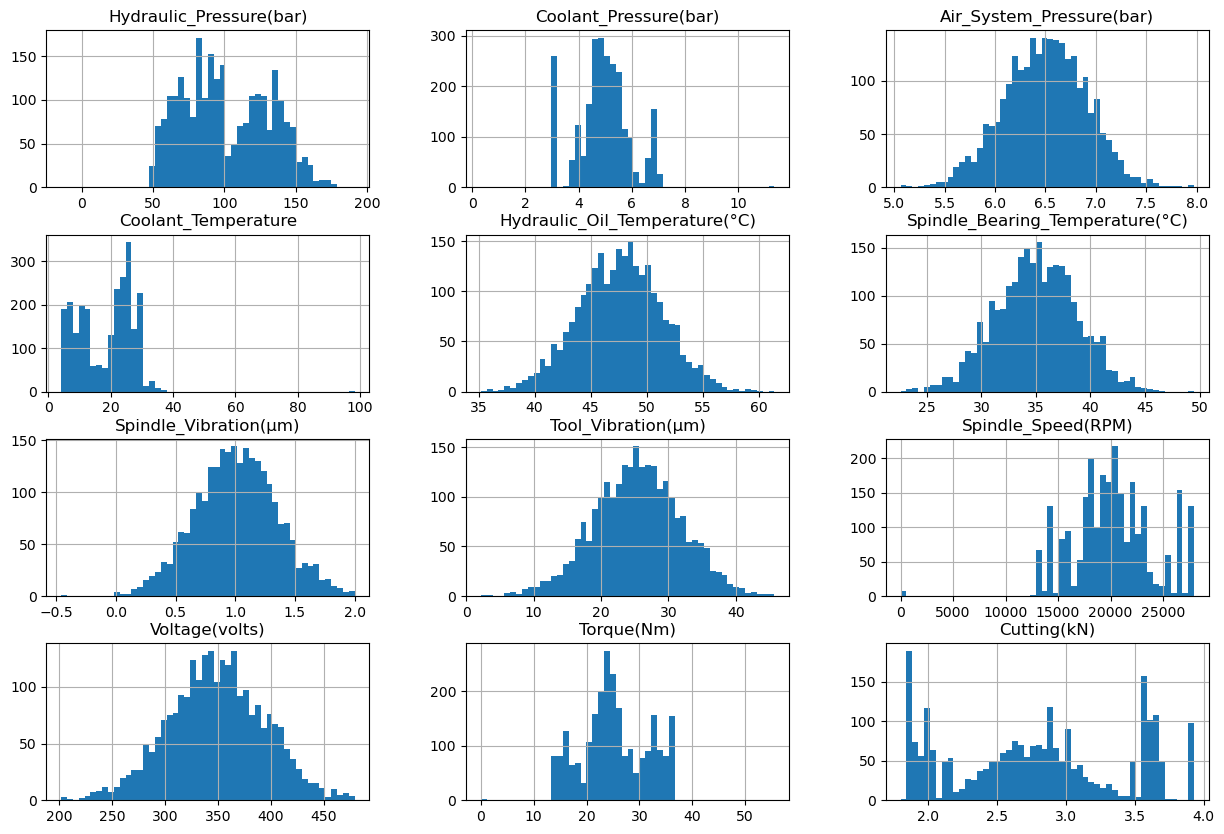

In [8]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(15, 10))
plt.show()


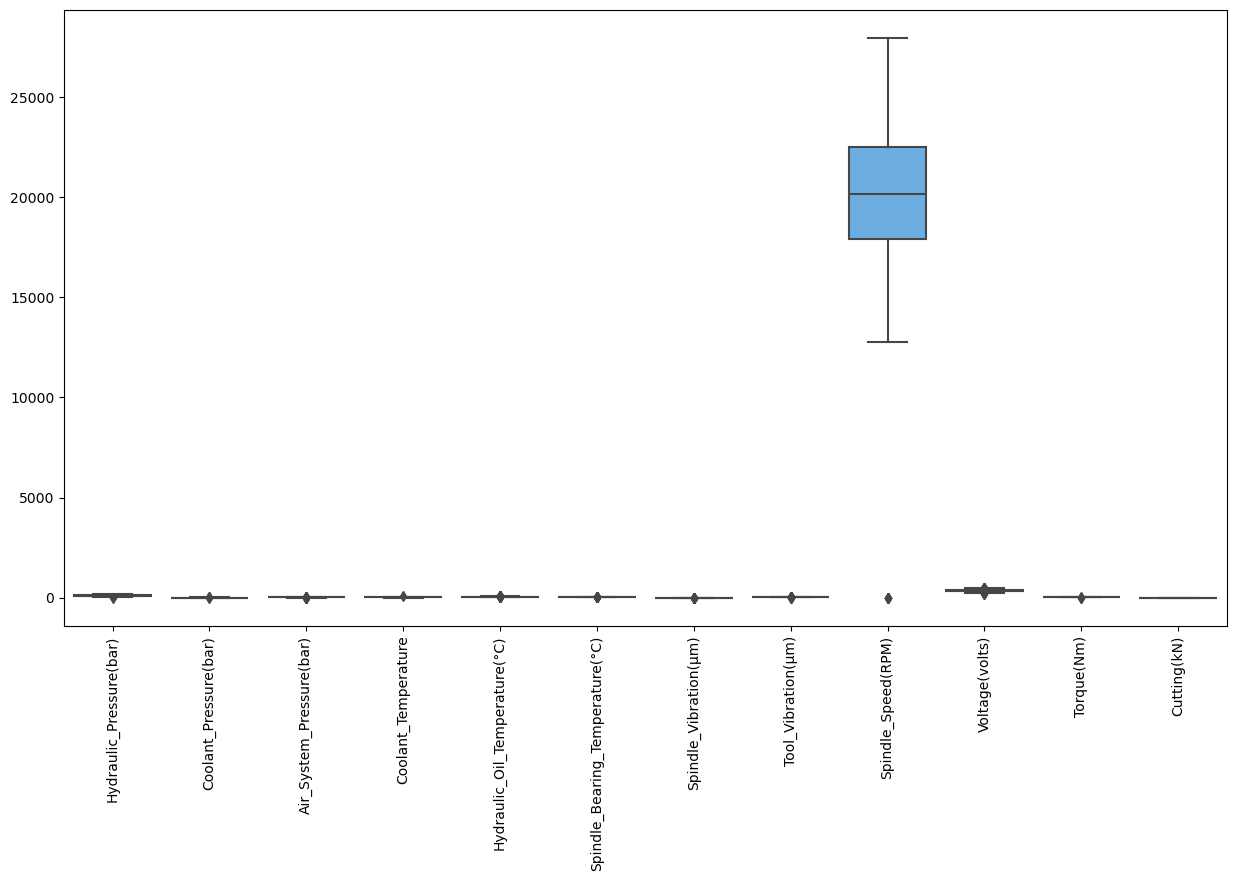

In [9]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate labels for better view
plt.show()


In [12]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf values to NaN
df.dropna(inplace=True)  # (Optional) if removing Nan


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


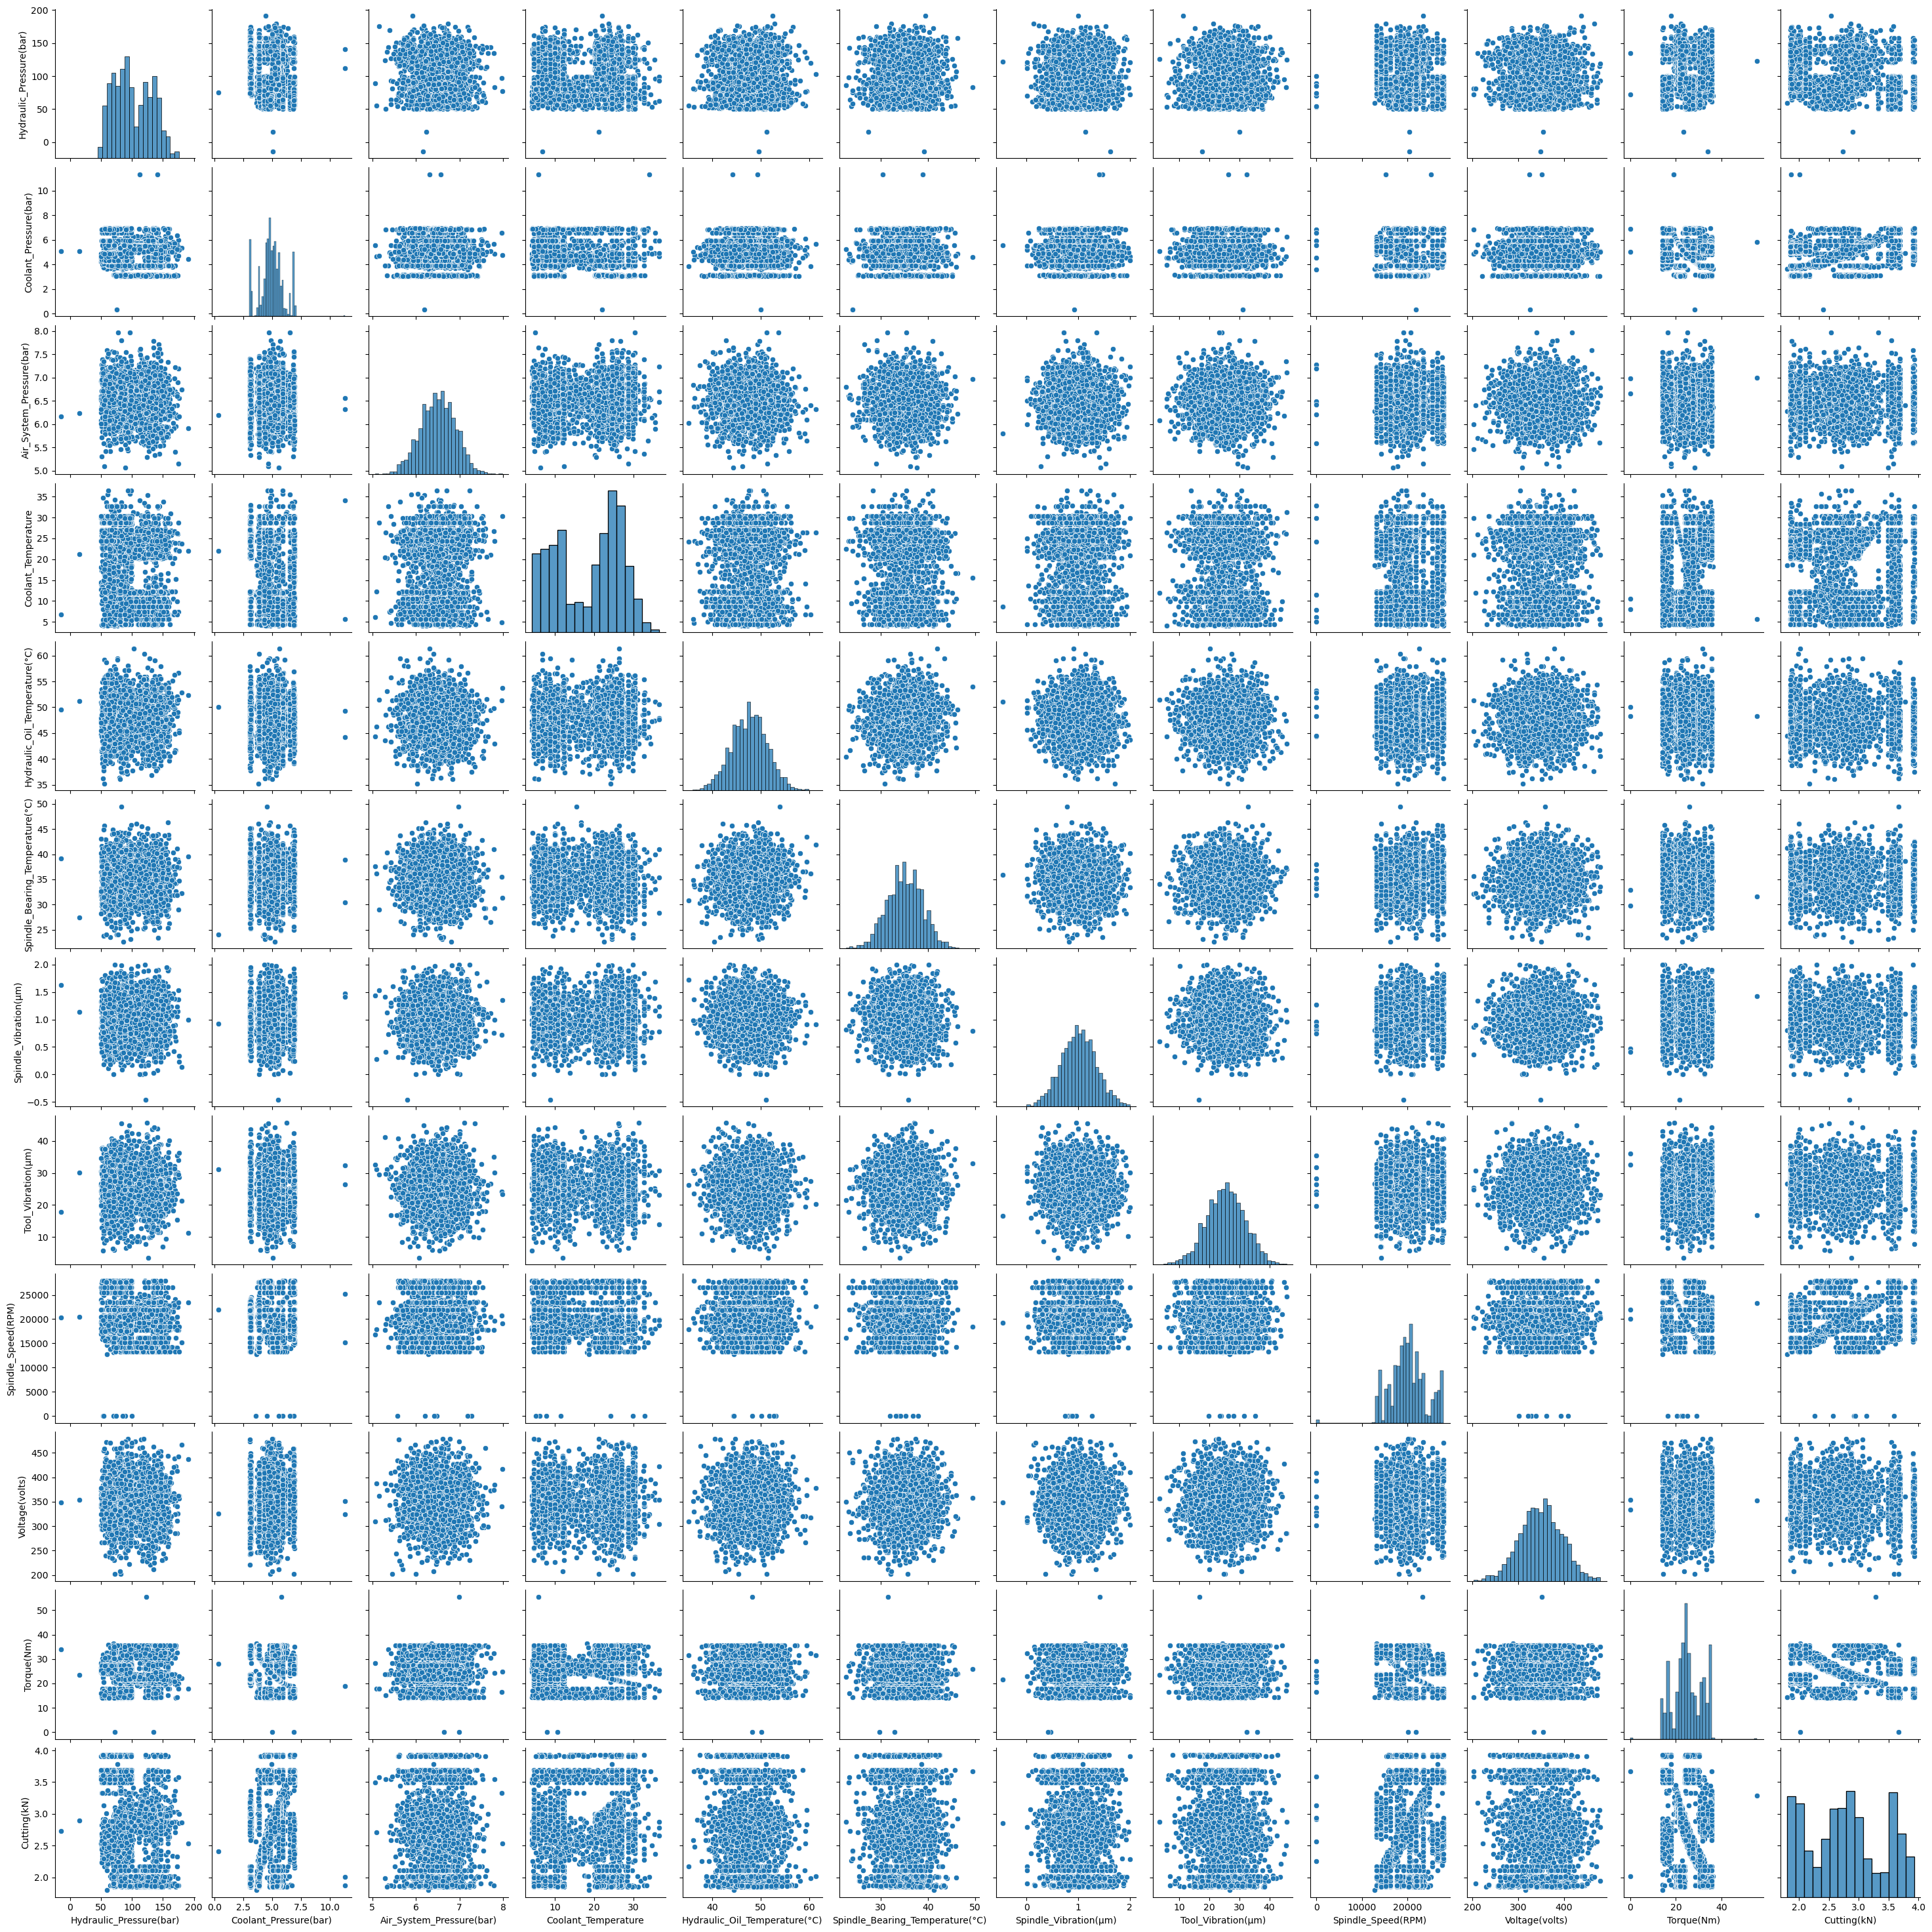

In [14]:
sns.pairplot(df)
plt.show()


In [16]:
print(df.dtypes)


Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(°C)      float64
Spindle_Bearing_Temperature(°C)    float64
Spindle_Vibration(µm)              float64
Tool_Vibration(µm)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object


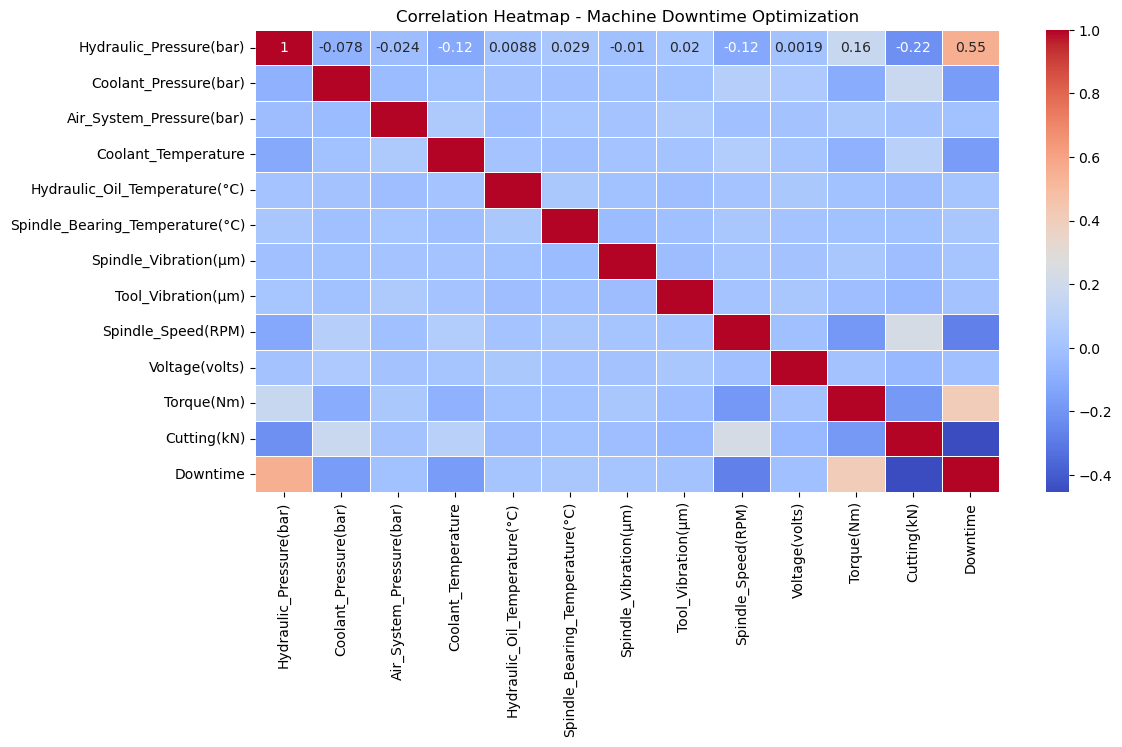

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#dataset load 
# df = pd.read_csv("") 

# Downtime converting to number
df['Downtime'] = df['Downtime'].astype('category').cat.codes  

# Sirf numeric columns le (object hata diya)
df_numeric = df.select_dtypes(include=[np.number])

# Heatmap plot 
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Machine Downtime Optimization")
plt.show()
